## Lab 3 Linear Regression - solution

We will use the "advertizing.csv" dataset from kaggle.com to train a linear regression model to predict sales from TV, radio and newspaper advertizing budget

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

#### 1. Import and inspect the advertizing data

- Import the data into a pandas df
- Check for missing values
- Inspect the descriptive statistics
- Plot and inspect heat map of the correlation matrix:
    - is there a strong correlation among the features (i.e., all columns except "sales")

In [2]:
df = pd.read_csv("https://github.com/wsko/data_science_academy/raw/main/data/advertising.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


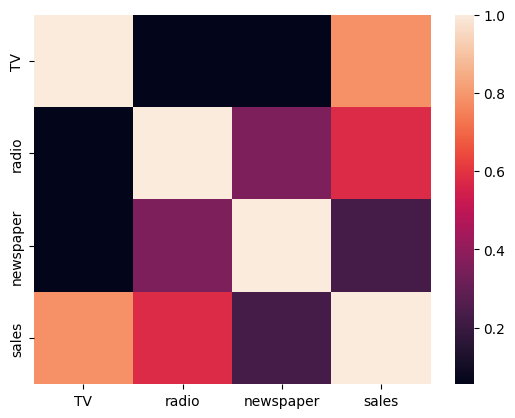

In [5]:
sns.heatmap(abs(df.corr()))
plt.show()

#### 2. Prepare data for modeling 
- Create arrays X (feature set) and y (label)
- Perform train-test split leaving out 10 % of the data for testing
- Perform scaling for X_train and X_test

In [6]:
## create numpy arrays X and y

label_col = 'sales'
y = df[label_col].values

feature_names = list(df.columns) ## note that we can leave some of the columns out of the feature set
feature_names.remove(label_col)
print(feature_names)

X = df[feature_names].values

print(X.shape, y.shape)


['TV', 'radio', 'newspaper']
(200, 3) (200,)


In [7]:
## perform train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, random_state=42)

In [8]:
## perform data scaling

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[0.54988164, 0.63709677, 0.46262093],
       [0.65843761, 0.96169355, 0.46262093],
       [0.98816368, 0.57056452, 0.37730871],
       [0.03719986, 0.74395161, 0.39489886],
       [0.74264457, 0.98790323, 0.02550572],
       [0.25160636, 0.70564516, 0.46086192],
       [0.73080825, 0.88508065, 0.23658751],
       [0.16672303, 0.23387097, 0.15919085],
       [0.74974636, 0.06854839, 0.11257696],
       [0.58978695, 0.45362903, 0.27440633],
       [0.10415962, 0.49596774, 0.01671064],
       [0.18769023, 0.11491935, 0.2585752 ],
       [0.79066622, 0.06854839, 0.74318382],
       [0.01589449, 0.60282258, 0.08003518],
       [0.46939466, 0.04233871, 0.23131047],
       [0.5732161 , 0.15725806, 0.30694811],
       [0.02231992, 0.56653226, 0.36147757],
       [0.66587758, 0.46975806, 0.12225154],
       [0.25228272, 0.40927419, 0.28320141],
       [0.80047345, 0.55443548, 0.0941073 ]])

#### 3. Train and score a linear regression model

Also, inspect model coefficients and provide your insights about each advertizing platform

In [9]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [10]:
lm.coef_

array([13.33742914,  9.18186801,  0.20618461])

In [11]:
print("MSE training:  ", mean_squared_error(y_train, lm.predict(X_train)))
print("MSE test:  ", mean_squared_error(y_test, lm.predict(X_test)))

MSE training:   2.7543155639500685
MSE test:   3.130802091238052


#### 4. Train and score a linear regression model on only the first two features (TV and radio)

In [12]:
lm = LinearRegression()
lm.fit(X_train[:, :2], y_train)
print("MSE training:  ", mean_squared_error(y_train, lm.predict(X_train[:, :2])))
print("MSE test:  ", mean_squared_error(y_test, lm.predict(X_test[:, :2])))

MSE training:   2.7556462978110265
MSE test:   3.0891353839787774


#### 5. Train and score univariate linear regression models on TV, radio and newspaper. 
####     Compare model scores. Which feature is the strongest predictor?

In [13]:
feature = 0

lm = LinearRegression()
lm.fit(X_train[:, [feature]], y_train) 
print("MSE training for", df.columns[feature], "____:", mean_squared_error(y_train, lm.predict(X_train[:, [feature]])))
print("MSE test for", df.columns[feature], "____:",mean_squared_error(y_test, lm.predict(X_test[:, [feature]])))

MSE training for TV ____: 10.38247997903617
MSE test for TV ____: 11.70656378106718


In [14]:
feature = 1

lm = LinearRegression()
lm.fit(X_train[:, [feature]], y_train) 
print("MSE training for", df.columns[feature], "____:", mean_squared_error(y_train, lm.predict(X_train[:, [feature]])))
print("MSE test for", df.columns[feature], "____:",mean_squared_error(y_test, lm.predict(X_test[:, [feature]])))

MSE training for radio ____: 17.497056811227196
MSE test for radio ____: 23.49811198484789


In [15]:
feature = 2

lm = LinearRegression()
lm.fit(X_train[:, [feature]], y_train) 
print("MSE training for", df.columns[feature], "____:", mean_squared_error(y_train, lm.predict(X_train[:, [feature]])))
print("MSE test for", df.columns[feature], "____:",mean_squared_error(y_test, lm.predict(X_test[:, [feature]])))

MSE training for newspaper ____: 24.693889314570697
MSE test for newspaper ____: 34.65829133924556


#### 6. Can we improve the model by adding polynomial features? What polynomial degree results in the best model accuracy?

In [16]:
MSE_train = []
MSE_test = []
for deg in range(1,6):
    pf = PolynomialFeatures(degree = deg)
    X_tr = pf.fit_transform(X_train)
    X_te = pf.fit_transform(X_test)
    lm = LinearRegression()
    lm.fit(X_tr, y_train)
    MSE_test.append(mean_squared_error(lm.predict(X_te), y_test))
    MSE_train.append(mean_squared_error(lm.predict(X_tr), y_train))

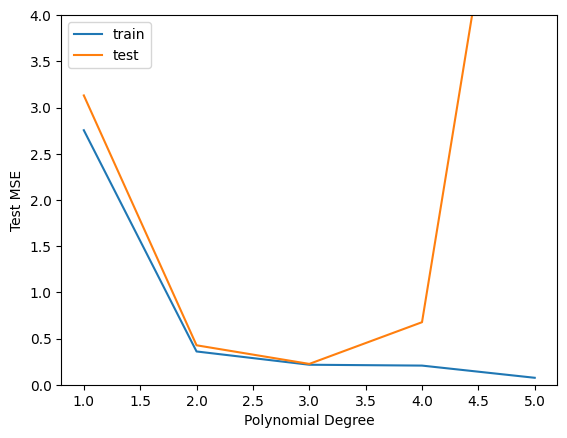

In [17]:
ax = sns.lineplot(y = MSE_train, x = np.arange(1,6), label = 'train')
ax = sns.lineplot(y = MSE_test, x = np.arange(1,6), label = 'test')
ax.set_xlabel("Polynomial Degree")
ax.set_ylabel("Test MSE")
ax.set_ylim((0,4))
plt.show()

In [18]:
MSE_test

[3.130802091238055,
 0.4267552679521727,
 0.22520193049889153,
 0.6766322021484371,
 8.15484825897217]

In [19]:
### Polynomial degree = 3 results in the most accurate model